# Benjamin Wilke
# Homework 4

In [47]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import add
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.metrics import confusion_matrix
import spacy
nlp = spacy.load("en_core_web_md")

## Question 1

Run one of the part-of-speech (POS) taggers available in Python. 

Find the longest sentence you can, longer than 10 words, that the POS tagger tags correctly. Show the input and output.

In [52]:
# https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b
pos_one_long = nltk.pos_tag(word_tokenize("He received the most votes in the first two states and is considered a favorite in Nevada"))
pos_one_long

[('He', 'PRP'),
 ('received', 'VBD'),
 ('the', 'DT'),
 ('most', 'RBS'),
 ('votes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('two', 'CD'),
 ('states', 'NNS'),
 ('and', 'CC'),
 ('is', 'VBZ'),
 ('considered', 'VBN'),
 ('a', 'DT'),
 ('favorite', 'NN'),
 ('in', 'IN'),
 ('Nevada', 'NNP')]

Find the shortest sentence you can, shorter than 10 words, that the POS tagger fails to tag 100 percent correctly. Show the input and output. Explain your conjecture as to why the tagger might have been less than perfect with this sentence.

In [63]:
pos_one_short = nltk.pos_tag(word_tokenize("Why would Will walk so weirdly?"))
pos_one_short

[('Why', 'WRB'),
 ('would', 'MD'),
 ('Will', 'VB'),
 ('walk', 'VB'),
 ('so', 'RB'),
 ('weirdly', 'RB'),
 ('?', '.')]

This seems to be getting tripped up around "would Will walk":

MD -> modal could, will

VB -> verb, base form

It's mistaken the word Will for a verb versus a proper noun, which is strange considering it's capitalized.

## Question 2

Run a different POS tagger in Python. Process the same two sentences from question 1.

Does it produce the same or different output?

Explain any differences as best you can.

In [64]:
pos_two_long = [token.pos_ for token in nlp("He received the most votes in the first two states and is considered a favorite in Nevada")]
[each for each in list(zip(pos_one_long, pos_two_long))]

[(('He', 'PRP'), 'PRON'),
 (('received', 'VBD'), 'VERB'),
 (('the', 'DT'), 'DET'),
 (('most', 'RBS'), 'ADJ'),
 (('votes', 'NNS'), 'NOUN'),
 (('in', 'IN'), 'ADP'),
 (('the', 'DT'), 'DET'),
 (('first', 'JJ'), 'ADJ'),
 (('two', 'CD'), 'NUM'),
 (('states', 'NNS'), 'NOUN'),
 (('and', 'CC'), 'CCONJ'),
 (('is', 'VBZ'), 'VERB'),
 (('considered', 'VBN'), 'VERB'),
 (('a', 'DT'), 'DET'),
 (('favorite', 'NN'), 'ADJ'),
 (('in', 'IN'), 'ADP'),
 (('Nevada', 'NNP'), 'PROPN')]

This is mostly correct. It seems that the spaCy POS tagger is less specific than NLTK. For example - the comparative adjective "most" is a special kind of comparative tag, verus merely an adjective. Also - it appears that spaCy miss tagged "favorite" here as an adjective when it should be a noun.

In [65]:
pos_two_short = [token.pos_ for token in nlp("Why would Will walk so weirdly?")]
[each for each in list(zip(pos_one_short, pos_two_short))]

[(('Why', 'WRB'), 'ADV'),
 (('would', 'MD'), 'VERB'),
 (('Will', 'VB'), 'VERB'),
 (('walk', 'VB'), 'VERB'),
 (('so', 'RB'), 'ADV'),
 (('weirdly', 'RB'), 'ADV'),
 (('?', '.'), 'PUNCT')]

The spaCy POS tagger also seems to mistake "Will" for verb, which is weird as now I'm noticing that both the POS taggers haven't identified a noun in the short sentence.

## Question 3

In a news article from this week’s news, find a random sentence of at least 10 words.

Looking at the Penn tag set, manually POS tag the sentence yourself.

Now run the same sentences through both taggers that you implemented for questions 1 and 2. Did either of the taggers produce the same results as you had created manually?

Explain any differences between the two taggers and your manual tagging as much as you can.

In [75]:
sentence = "He is benefiting from male privilege and would not be treated the same if he were a woman."

In [76]:
POS = ['PRP', 'VBZ', 'VGB', 'IN', 'JJ', 'NN', 'CC', 'MD', 'RB', 'VB', 'VBN', 'DT', 'JJ', 'IN', 'PRP', 'VBD', 'DT', 'NN']

In [77]:
[each for each in list(zip(sentence.split(), POS))]

[('He', 'PRP'),
 ('is', 'VBZ'),
 ('benefiting', 'VGB'),
 ('from', 'IN'),
 ('male', 'JJ'),
 ('privilege', 'NN'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('treated', 'VBN'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('if', 'IN'),
 ('he', 'PRP'),
 ('were', 'VBD'),
 ('a', 'DT'),
 ('woman.', 'NN')]

In [78]:
nltk.pos_tag(word_tokenize(sentence))

[('He', 'PRP'),
 ('is', 'VBZ'),
 ('benefiting', 'VBG'),
 ('from', 'IN'),
 ('male', 'JJ'),
 ('privilege', 'NN'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('treated', 'VBN'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('if', 'IN'),
 ('he', 'PRP'),
 ('were', 'VBD'),
 ('a', 'DT'),
 ('woman', 'NN'),
 ('.', '.')]

The NLTK POS tagger was spot on.

In [82]:
[each for each in zip(sentence.split(), [token.pos_ for token in nlp(sentence)])]

[('He', 'PRON'),
 ('is', 'VERB'),
 ('benefiting', 'VERB'),
 ('from', 'ADP'),
 ('male', 'ADJ'),
 ('privilege', 'NOUN'),
 ('and', 'CCONJ'),
 ('would', 'VERB'),
 ('not', 'ADV'),
 ('be', 'VERB'),
 ('treated', 'VERB'),
 ('the', 'DET'),
 ('same', 'ADJ'),
 ('if', 'ADP'),
 ('he', 'PRON'),
 ('were', 'VERB'),
 ('a', 'DET'),
 ('woman.', 'NOUN')]

While not as specific as the NLTK POS tagger the spaCy tagger is also accurate for this fairly simplistic sentence.

## Question 4

Prepare the train.txt Dataset for insertion into a RNN.

The data is not in proper format.  Each line lists a word and 4 tags.  Your task is to form the words into sequences and form target sequences as well.

Your target is the last (fourth) tag.

Sentences are listed vertically.  A blank line indicates a new sentence.  

Form the sentences into sequences

Form the fourth tag into a sequence of targets.

Encode the data to integers.  You will need two dictionaries:

Word to integer

Target Category to integer

You should turn in the functions and code you use to perform this task—I will use them on a hidden dataset to test your success at encoding.  Padding is required—this data should be ready to put into a neural network.

In [4]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read().splitlines()
    file.close()
    return text

In [5]:
raw_doc = load_doc("train.txt")                                           #<-- load raw doc
blank_lines = [idx for idx, each in enumerate(raw_doc) if each == '']     #<-- get index of each blank line

In [6]:
# parses raw doc to return raw words and targets
def getSentencesTargets(doc, blank_lines):
    sentences = list()
    targets = list()
    
    start_index = 0                                        #<-- start at index 0
    end_index = blank_lines[0]                             #<-- set first end_index

    for current_blank in range(len(blank_lines)):
        sent_words = [word.split()[0].lower() for word in raw_doc[start_index:end_index]] #<-- isolate each word in the raw_doc range, lower()
        sentences.append(sent_words)                                                      #<-- append sentence
        target_classes = [word.split()[-1] for word in raw_doc[start_index:end_index]]    #<-- isolate each target in the raw_doc
        targets.append(target_classes)                                                    #<-- append target
        start_index = end_index + 1                        #<-- set next start_index, to last end_index + 1 (next line)
        if current_blank < len(blank_lines) - 1:           #<-- if we're not at the end of the list (protect from out of range)
            end_index = blank_lines[current_blank + 1]     #<-- then the new end_index is equal to next new end
            
    return sentences, targets            

In [2]:
# function returns true if any character in a string is a number 
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [3]:
# cleans raw words and targets to remove non-words while also removing corresponding non-word targets
def cleanSentencesTarget(sentences, targets):
    remove_list = ['.',',','$','(',')','\'s','\"',':','-','/','--','\'',';']      #<-- specific characters we want to remove
    
    clean_sentences = list()
    clean_targets = list()
    
    for sentence in range(len(sentences)):                      #<-- for each sentence
        current_sentence = list()
        current_target = list()                  
        for idx, word in enumerate(sentences[sentence]):        #<-- examine each word
            if word not in remove_list and not hasNumbers(word):#<-- if not in remove list or contains number
                current_sentence.append(word)                   #<-- add word to current_sentence
                current_target.append(targets[sentence][idx])   #<-- add corresponding target to current_target
        if len(current_sentence) > 0:                           #<-- only add the current sentence if it's not null
            clean_sentences.append(current_sentence)            #<-- append cleaned sentence 
            clean_targets.append(current_target)                #<-- append corresponding targets
    
    return clean_sentences, clean_targets

In [7]:
# parse raw sentence and target lists
sentences, targets = getSentencesTargets(raw_doc, blank_lines)

# clean sentence and target lists
clean_sentences, clean_targets = cleanSentencesTarget(sentences, targets)

In [8]:
def getWordCounts(sentences):
    word_counts = {}
    for sent in sentences:
        for w in sent:
            word_counts[w] = word_counts.get(w, 0) + 1
    return word_counts

In [9]:
# get dictionary of all words and corresponding occurance counts
word_counts = getWordCounts(clean_sentences)

In [10]:
# create our word to index & index to word mapping 
def createWord2IndexIndex2Word(word_counts, word_count_threshold):
    vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
    idxtoword = dict(enumerate(vocab, 3))
    idxtoword[0] = '<PAD>'
    idxtoword[1] = '<UNK>'
    idxtoword[2] = '<START>'
    wordtoix = dict([(value, key) for (key, value) in idxtoword.items()])
    return wordtoix, idxtoword

In [41]:
# create our target (Y) category mapping
def createTarget2CategoryIndex(targets):
    unique_targets = list()
    for target in targets:                                                      #<-- get a list of all eligible target values
        for each in target:
            unique_targets.append(each)
    targettoix = {k:idx + 1 for idx, k in enumerate(list(set(unique_targets)))} #<-- saves room for <PAD> at 0
    targettoix["<PAD>"] = 0                                                     #<-- creates <PAD> at 0
    idxtotarget = dict([(value, key) for (key, value) in targettoix.items()])
    return targettoix, idxtotarget

In [42]:
# create our word to index & index to word mapping - include all words since most of our Named Entities don't occur very often
wordToIndex, indexToWord = createWord2IndexIndex2Word(word_counts, 1)

# create our target (Y) category mapping
targetToIndex, IndexToTarget = createTarget2CategoryIndex(clean_targets)

In [13]:
# returns sequence of index from word sentence input, if word doesn't exist sets to 1
def sequenceFromSentenceList(sentence):
    return [wordToIndex[word] if word in wordToIndex.keys() else 1 for word in sentence]

In [14]:
# returns sequence of words from index sentence input
def sentenceFromSequenceList(sequence):
    return [indexToWord[idx] for idx in sequence]

In [15]:
# return sequence of target index from target sequence
def sequenceFromTargetSequence(targetsequence):
    return [targetToIndex[target] for target in targetsequence]

In [16]:
# let's encode our X and Y
X_data = [sequenceFromSentenceList(sent) for sent in clean_sentences]
y_data = [sequenceFromTargetSequence(target) for target in clean_targets]

The largest sequence length is: 75


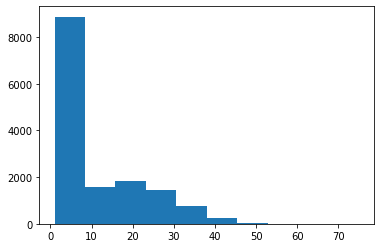

In [17]:
# lets look at sequence length
seq_length = [len(sent) for sent in clean_sentences]
print("The largest sequence length is: {}".format(max(seq_length)))
plt.hist(seq_length)
plt.show()

In [18]:
max_seq_length = 35
# now let's pad out X_data and Y_data
X = sequence.pad_sequences(X_data, maxlen=max_seq_length)
y = sequence.pad_sequences(y_data, maxlen=max_seq_length)

## Let's Model

In [21]:
embedding_vector_length = 100
vocabulary_size = len(wordToIndex)
n_tags = len(targetToIndex)

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_vector_length, input_length=max_seq_length, mask_zero=True))
model.add(LSTM(units=500, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(TimeDistributed(Dense(n_tags, activation="softmax")))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 100)           1715300   
_________________________________________________________________
lstm (LSTM)                  (None, 35, 500)           1202000   
_________________________________________________________________
time_distributed (TimeDistri (None, 35, 10)            5010      
Total params: 2,922,310
Trainable params: 2,922,310
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train, X_val = X[4000:], X[:4000]
y_train, y_val = y[4000:], y[:4000]

In [26]:
checkpoint = ModelCheckpoint('FirstTimeDistributedModel.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[checkpoint], batch_size=8, epochs=3, shuffle=True, verbose=1)

Train on 10724 samples, validate on 4000 samples
Epoch 1/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.8439
Epoch 00001: val_accuracy improved from -inf to 0.88843, saving model to FirstTimeDistributedModel.h5
10724/10724 [==============================] - 531s 49ms/sample - loss: 0.1640 - accuracy: 0.8440 - val_loss: 0.1076 - val_accuracy: 0.8884
Epoch 2/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9460
Epoch 00002: val_accuracy improved from 0.88843 to 0.92187, saving model to FirstTimeDistributedModel.h5
10724/10724 [==============================] - 435s 41ms/sample - loss: 0.0561 - accuracy: 0.9460 - val_loss: 0.0819 - val_accuracy: 0.9219
Epoch 3/3
10720/10724 [============================>.] - ETA: 0s - loss: 0.0324 - accuracy: 0.9677
Epoch 00003: val_accuracy improved from 0.92187 to 0.92495, saving model to FirstTimeDistributedModel.h5
10724/10724 [==============================] - 418s 39ms/sampl

In [28]:
what = model.predict_classes(X_val)

In [33]:
#use this cell to EXCLUDE padding from confusion matrix
count = 0
total = 0
pred = []
actual = []

for prediction in range(what.shape[0]):                        #<-- for each sequence
    for i in range(max_seq_length):                            #<-- each item in sequence
        if y_val[prediction][i]==0:                            #<-- if the corresponding y_val is <PAD> skip it
            pass
        else:                                                  #<-- otherwise
            if y_val[prediction][i]==what[prediction][i]:      #<-- compare the prediction to y_val
                count = count+1                                #<-- if the same increment count
            total=total+1                                      #<-- update total eligible predictions (not <PAD>)
            pred.append(what[prediction][i])                   #<-- add the prediction to list
            actual.append(y_val[prediction][i])                #<-- add corresponding actual to a list

Confusion matrix, without normalization
[[  881    51    64     0   382    17     2    24    76]
 [   37   710    37     5   154     1     0     6     8]
 [  121     9  1792     0   214     7     6    14    45]
 [    0    11     2   181   117     1     1     8     0]
 [  136    19    15    15 31457    27     6    83    97]
 [   11     0     7     0   162  1267     0    22    30]
 [    2     0     9     1    63     9   180    35     2]
 [   31     8    29     7   361    21     7   396     7]
 [   79     1    11     0   313    47     4    14  1479]]
Normalized confusion matrix
[[5.89e-01 3.41e-02 4.28e-02 0.00e+00 2.55e-01 1.14e-02 1.34e-03 1.60e-02
  5.08e-02]
 [3.86e-02 7.41e-01 3.86e-02 5.22e-03 1.61e-01 1.04e-03 0.00e+00 6.26e-03
  8.35e-03]
 [5.48e-02 4.08e-03 8.12e-01 0.00e+00 9.69e-02 3.17e-03 2.72e-03 6.34e-03
  2.04e-02]
 [0.00e+00 3.43e-02 6.23e-03 5.64e-01 3.64e-01 3.12e-03 3.12e-03 2.49e-02
  0.00e+00]
 [4.27e-03 5.96e-04 4.71e-04 4.71e-04 9.88e-01 8.48e-04 1.88e-04 2.61e-03


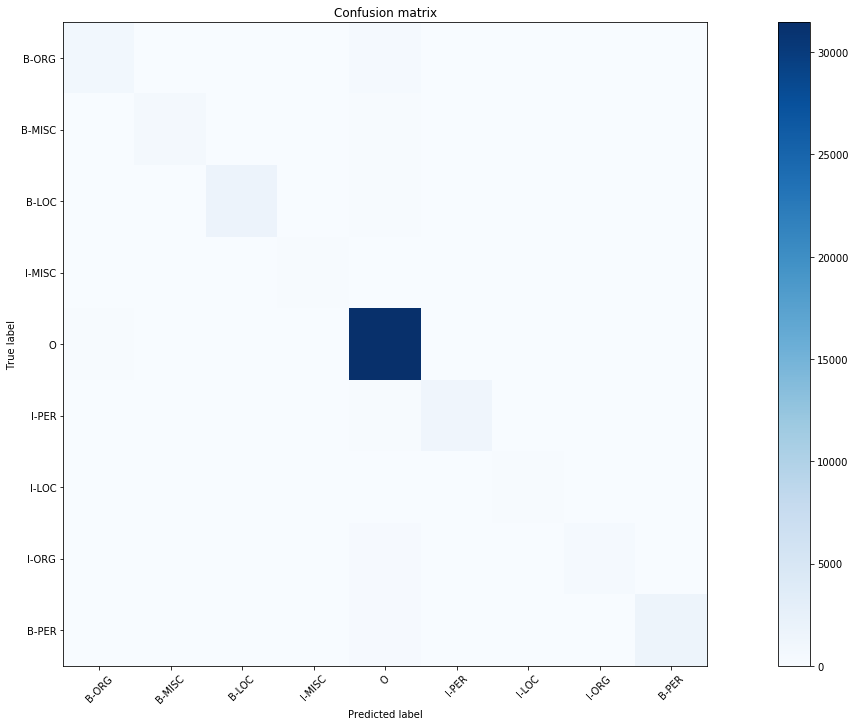

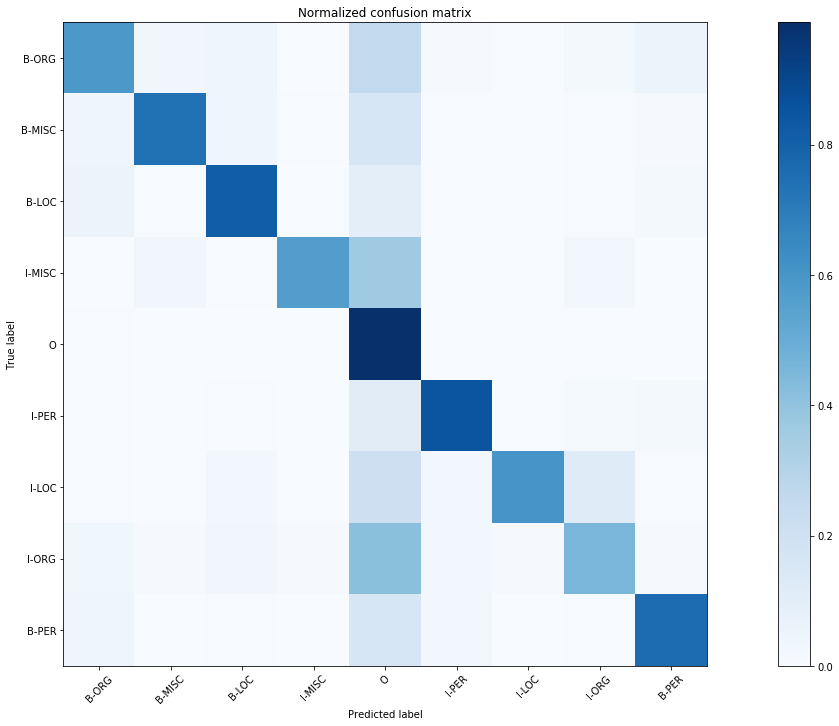

In [44]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    all_val = list(set(actual+pred))
    tick_marks = np.arange(len(all_val))
    plt.xticks(tick_marks,[IndexToTarget[i] for i in all_val], rotation=45)
    plt.yticks(tick_marks,[IndexToTarget[i] for i in all_val])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(actual, pred)


np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
from matplotlib.pyplot import figure

plt.show()